# Insurance Claims_Fraud Detection
# Problem Statement

Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, I have a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, I will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing Libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df = pd.read_csv('Automobile_insurance.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory Data Analysis
# 1- Data Exploration

In [4]:
df.shape

(1000, 40)

We have 1000 rows and 40 columns in our dataset.

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
#Lets check the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

I have 2 Float type, 17 Integer type and 21 Object type data. At initial look, there are no null values except for column _c39 which has all null values.

In [7]:
#lets drop _c39 column

df = df.drop(["_c39"],axis=1)

In [8]:
#lets check no. of unique values present in each column.

df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
#Droping policy_number and incident_location column
df = df.drop(["policy_number"],axis=1)
df = df.drop(["incident_location"],axis=1)

In [10]:
#lets check value_counts for columns above 900 unique values.

df["policy_bind_date"].value_counts()

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [11]:
df["policy_annual_premium"].value_counts()


1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64

In [12]:
df["insured_zip"].value_counts()


477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

No empty spaces or ? in the above columns.



In [13]:
#lets divide columns into categorical and numerical columns.

cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [14]:
# Now checking for numerical columns
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [15]:
#lets check value counts of categorical column

for i in df[cat_cols]:
    print(df[i].value_counts())
    print('*********************************************************************')
    print("               ")

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
*********************************************************************
               
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
*********************************************************************
               
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
*********************************************************************
               
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
*********************************************************************
               
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
***************************************************

In [16]:
#Lets see which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [17]:
# let's check the mode of collision_type column 
df["collision_type"].mode()

0    Rear Collision
Name: collision_type, dtype: object

In [18]:
#Replacing '?' with mode value
df['collision_type'] = df.collision_type.str.replace('?', 'Rear Collision')

In [19]:
# let's check the mode of property_damage column 
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [20]:
#Replacing '?' with mode value
df['property_damage'] = df.property_damage.str.replace('?', 'NO')

In [21]:
#Checking the value counts of police_report_available column
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [22]:
#Replacing '?' with mode value
df['police_report_available'] = df.police_report_available.str.replace('?', 'NO')


In [23]:
#Checking null values in the dataset

df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [24]:
#value counts of our target

df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [25]:
#lets check value_counts for numerical columns:

for i in df[num_cols]:
    print(df[i].value_counts().sort_index())
    print('*********************************************************************')
    print("               ")

0      1
1      3
2      2
3      2
4      3
      ..
473    1
475    2
476    1
478    2
479    2
Name: months_as_customer, Length: 391, dtype: int64
*********************************************************************
               
19     1
20     1
21     6
22     1
23     7
24    10
25    14
26    26
27    24
28    30
29    35
30    42
31    42
32    38
33    39
34    44
35    32
36    32
37    41
38    42
39    48
40    38
41    45
42    32
43    49
44    32
45    26
46    33
47    24
48    25
49    14
50    13
51     9
52     4
53    13
54    10
55    14
56     8
57    16
58     8
59     5
60     9
61    10
62     4
63     2
64     2
Name: age, dtype: int64
*********************************************************************
               
500     342
1000    351
2000    307
Name: policy_deductable, dtype: int64
*********************************************************************
               
433.33     1
484.67     1
538.17     1
566.11     1
617.11     1
          ..
1

In [26]:
#Droping umbrella_limit column having 80% zeros

df=df.drop(["umbrella_limit"],axis=1)

insured_zip column has 995 unique values and its like an ID which does not have any effect on my model. so dropping them.

In [27]:
#Droping insured_zip column 

df = df.drop(["insured_zip"],axis=1)

# Feature Engineering

In [28]:

#Extracting auto_age from auto year

df['auto_age'] = 2018 - df['auto_year']

In [29]:
#Droping auto_year column after extraction
df = df.drop(["auto_year"],axis=1)

In [30]:
#By taking policy_csl column lets extract two other columns.
#Extracting columns from policy_csl
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

#policy_csl was object type data before now i have to convert extracted data from object to int dtype.

#Changing dtype of extracted column
df[['csl_per_person']] = df[['csl_per_person']].astype('int64')
df[['csl_per_accident']] = df[['csl_per_accident']].astype('int64')

In [31]:
#Droping policy_csl column after extraction
df = df.drop(["policy_csl"],axis=1)

In [32]:
#Converting date to datetime 
df['policy_bind_date'] =  pd.to_datetime(df['policy_bind_date'])
df['incident_date'] =  pd.to_datetime(df['incident_date'])

In [33]:
#Checking the data types of all columns again
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day                int64
number_of_vehicles_involved       

In [34]:
#Extracting policy_bind year,month and day from policy_bind_date

# year
df["policy_bind_year"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.year

#month
df["policy_bind_month"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.month

#day
df["policy_bind_day"]=pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.day


In [35]:
#Droping policy_bind_date column 
df = df.drop(["policy_bind_date"],axis=1)

In [36]:
#Extracting incident year,month and day from incident_date

#year
df["incident_year"]=pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.year

#month
df["incident_month"]=pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.month

#day
df["incident_day"]=pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.day
#

In [37]:
#Droping incident_date column 
df = df.drop(["incident_date"],axis=1)

In [38]:
#Checking the value count agian
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
****************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
****************************************
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
****************************************
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
****************************************
1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29

In [39]:
#Droping incident_year 

df = df.drop(["incident_year"],axis=1)

In [40]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,auto_age,csl_per_person,csl_per_accident,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,14,250,500,2014,10,17,1,25
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,11,250,500,2006,6,27,1,21
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,11,100,300,2000,6,9,2,22
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,4,250,500,1990,5,25,10,1
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,9,500,1000,2014,6,6,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,Accord,N,12,500,1000,1991,7,16,2,22
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,Passat,N,3,100,300,2014,5,1,1,24
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,Impreza,N,22,250,500,2003,2,17,1,23
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,A5,N,20,500,1000,2011,11,18,2,26


In [41]:
#checking new shape

df.shape

(1000, 39)

In [42]:
#lets describe the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,203.95400,115.113174,0.00,115.7500,199.5,276.250,479.00
age,1000.0,38.94800,9.140287,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1136.00000,611.864673,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
capital-gains,1000.0,25126.10000,27872.187708,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-26793.70000,28104.096686,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,11.64400,6.951373,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.83900,1.018880,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,0.99200,0.820127,0.00,0.0000,1.0,2.000,2.00
witnesses,1000.0,1.48700,1.111335,0.00,1.0000,1.0,2.000,3.00


* We have negative values in our dataset.
* mean and m edian of few columns are very different. skewness is present.
* all features have count as 1000.
* a few of the columns have minimum value as 0.

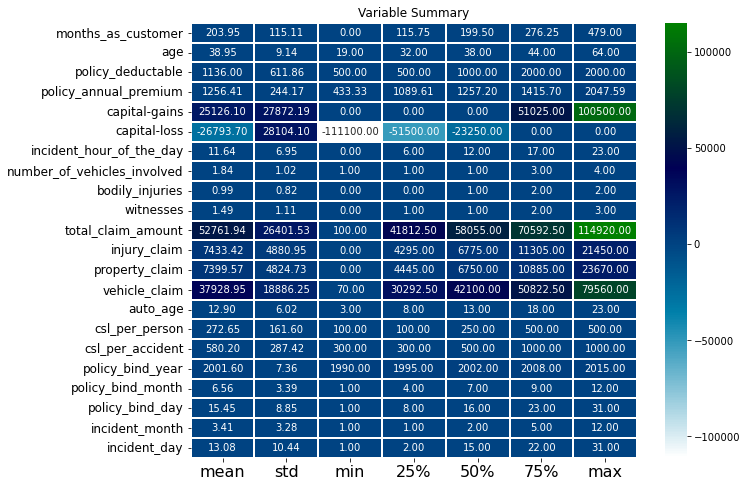

In [43]:
#Heatmap of the Describe function

plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='ocean_r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

We can see that there are some huge variations in the max and minimum numbers. Outliers are present in the dataset.

# 3- Data Visualization
# 3.1 Univariate Analysis

In [44]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [45]:
num_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_cols.append(i)
print(num_cols)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_age', 'csl_per_person', 'csl_per_accident', 'policy_bind_year', 'policy_bind_month', 'policy_bind_day', 'incident_month', 'incident_day']


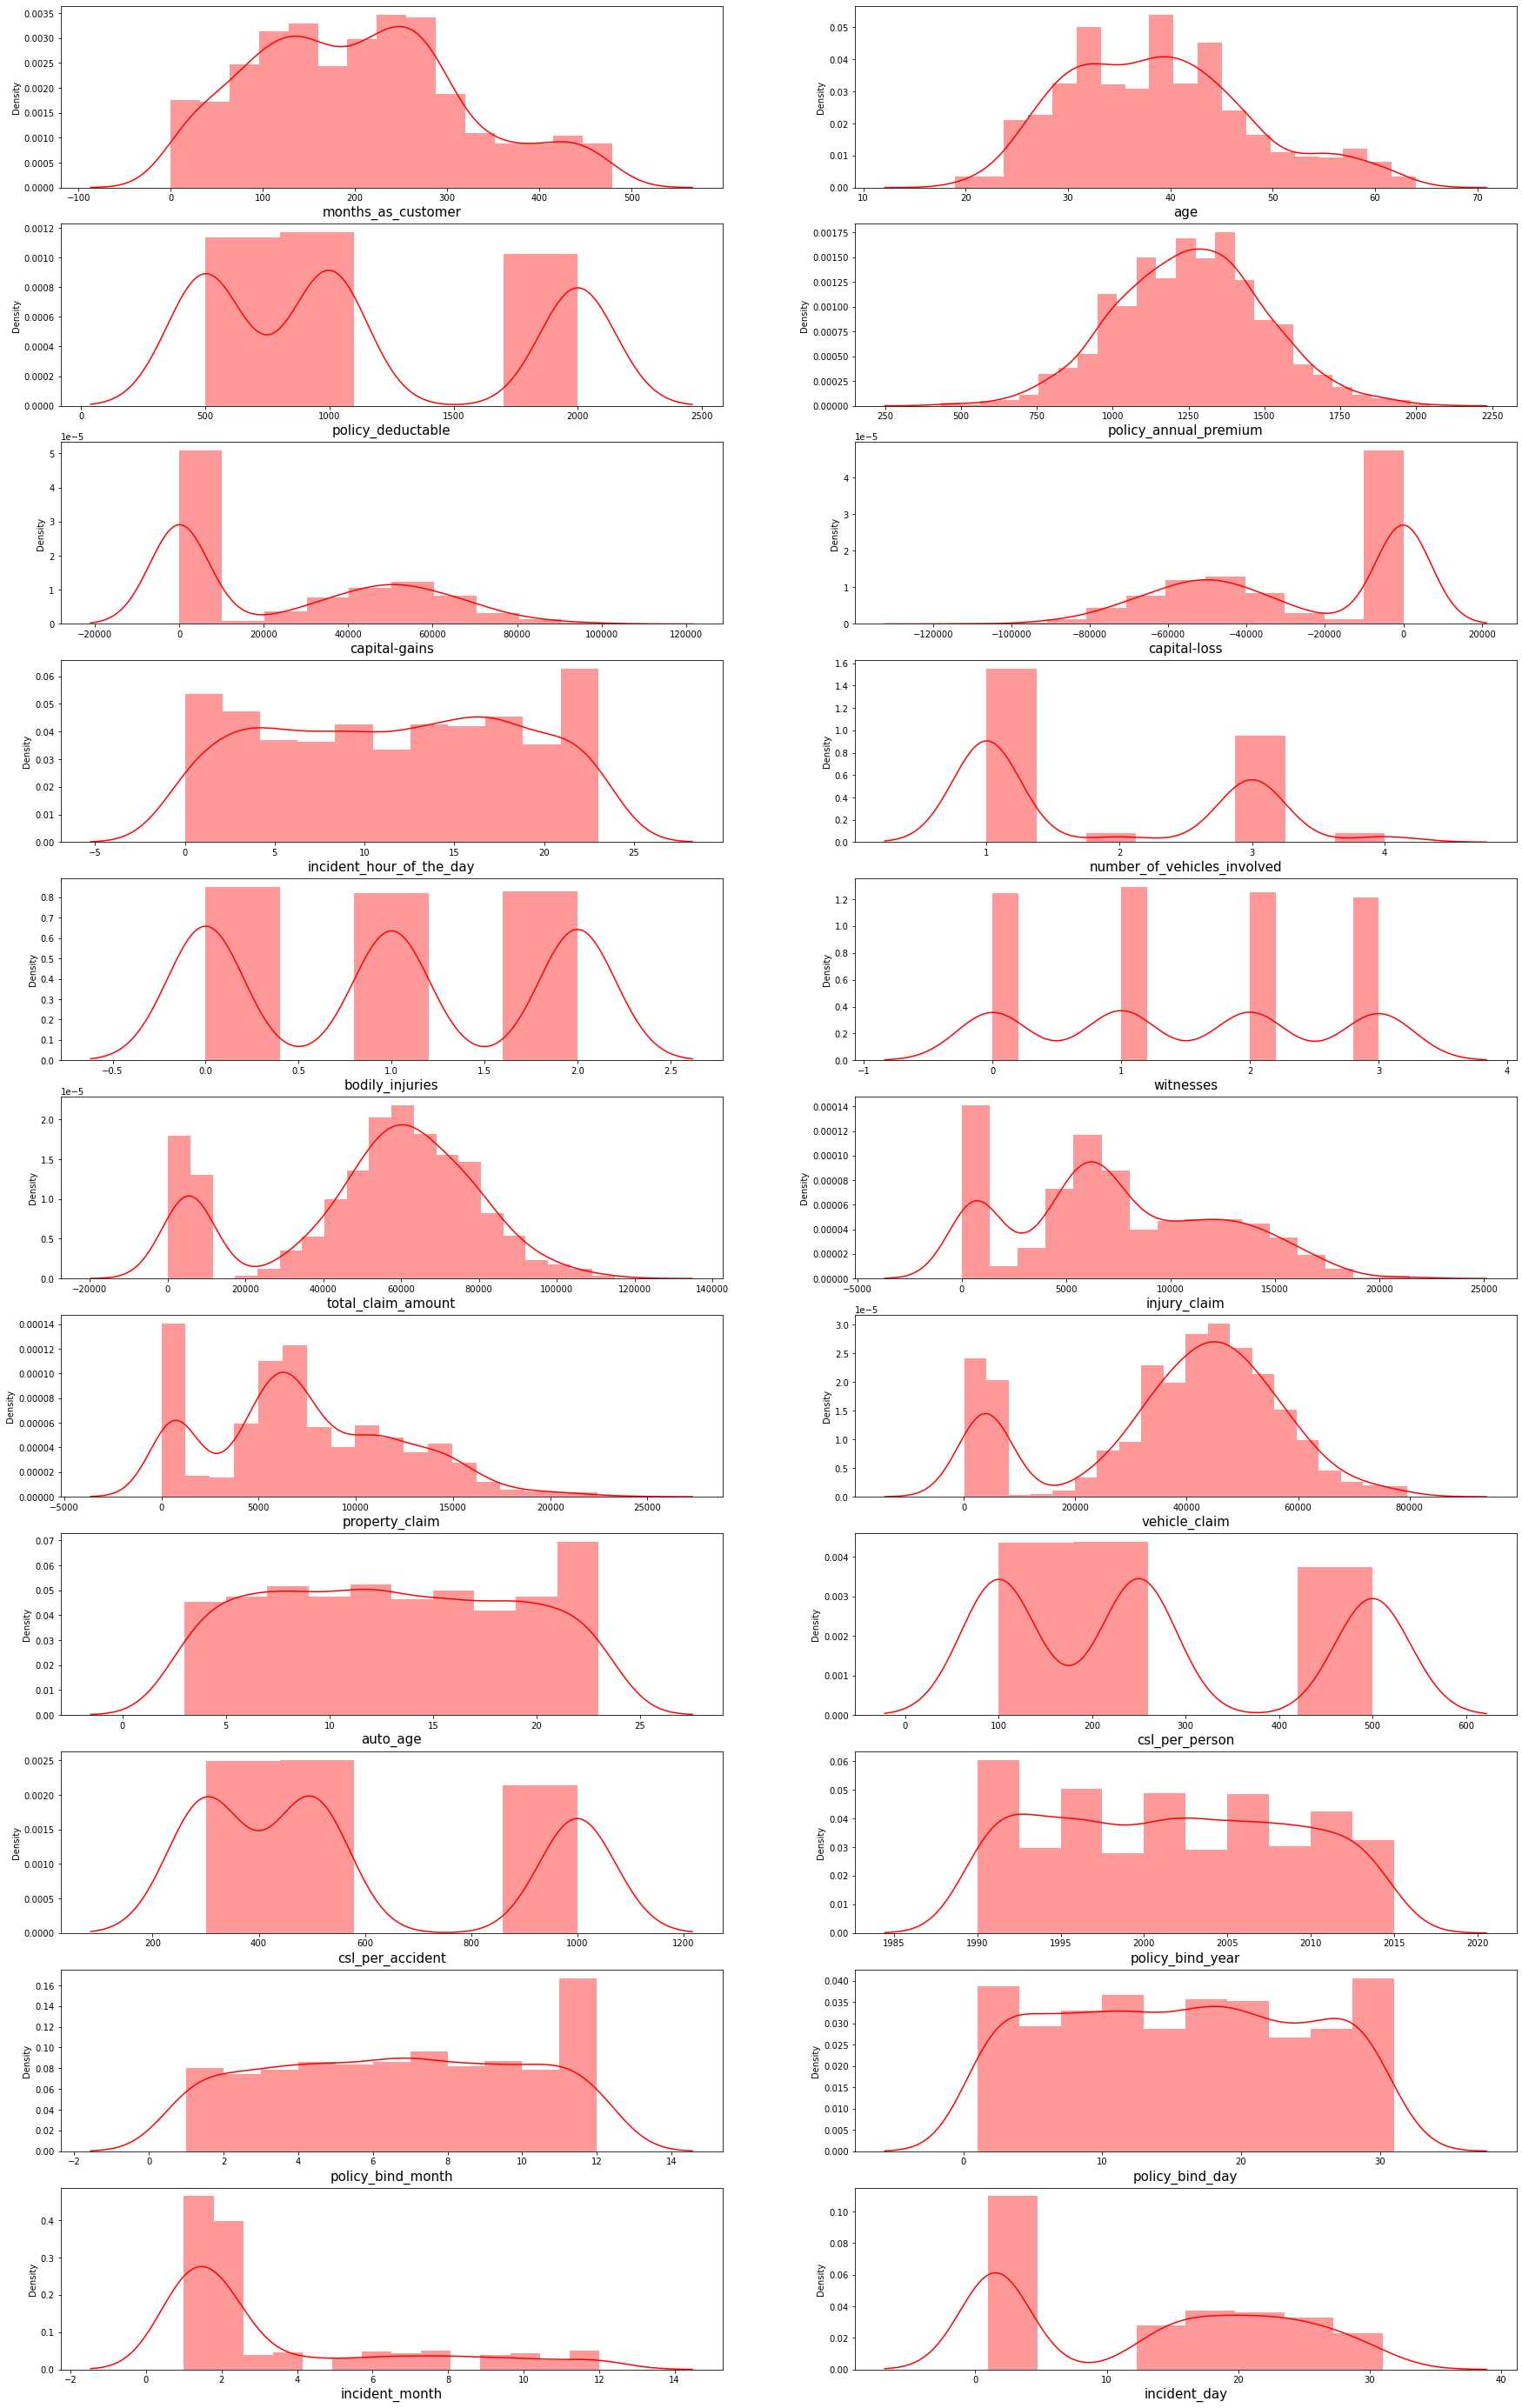

In [46]:
#The distribution of data for numerical columns?

plt.figure(figsize=(30,50), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(11,2,plotnumber)
        sns.distplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

* We can see that few columns have skewness present in them.
* Our columns are distributed normally or symmetrical.

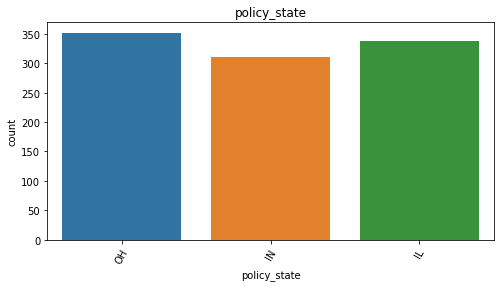

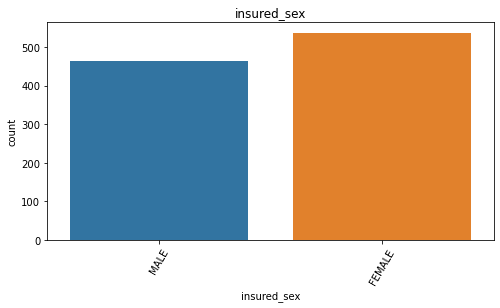

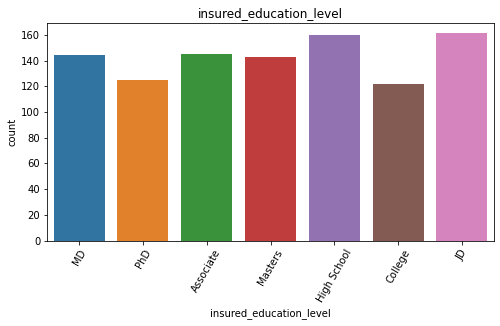

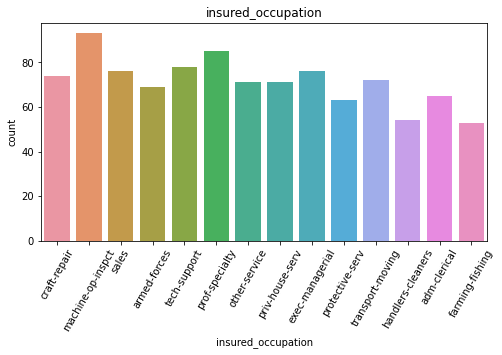

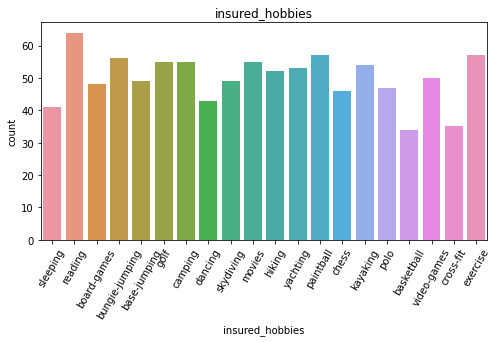

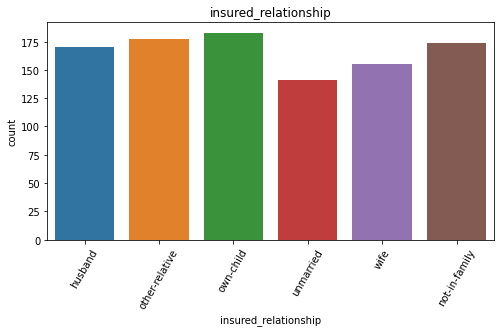

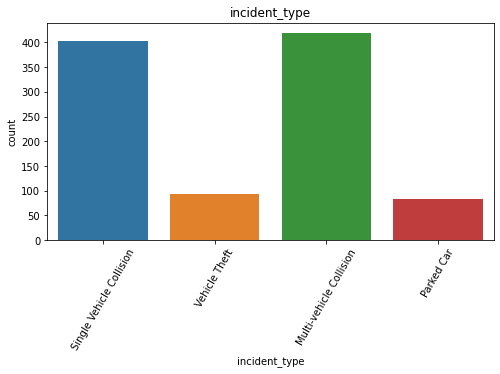

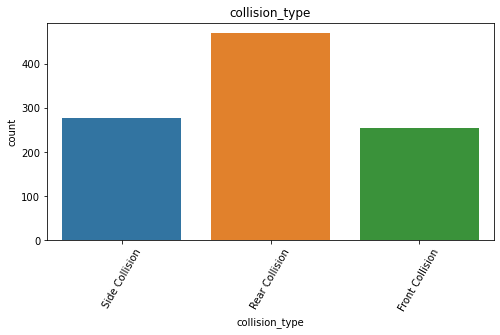

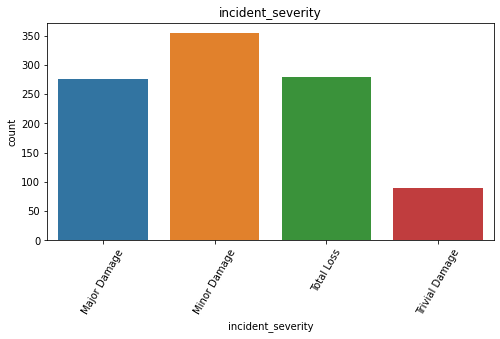

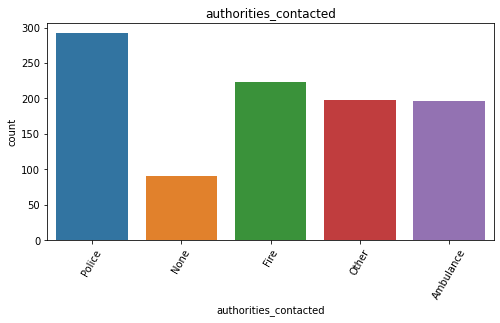

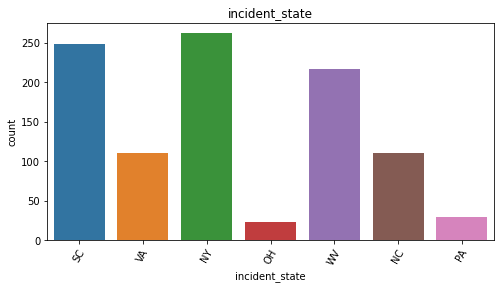

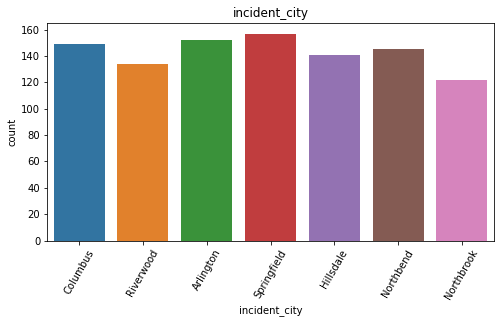

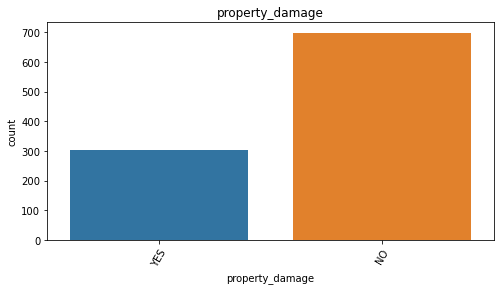

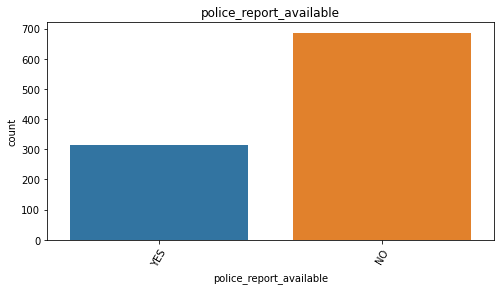

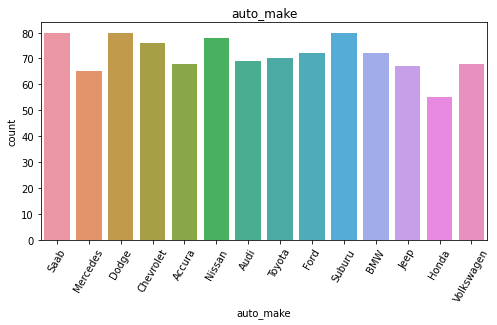

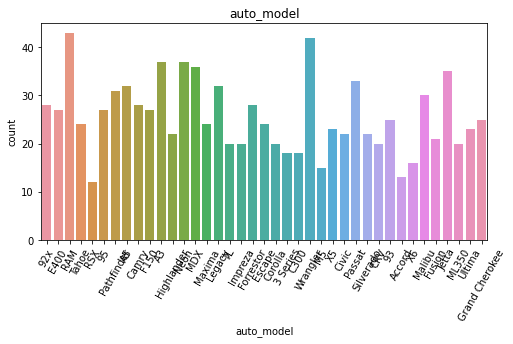

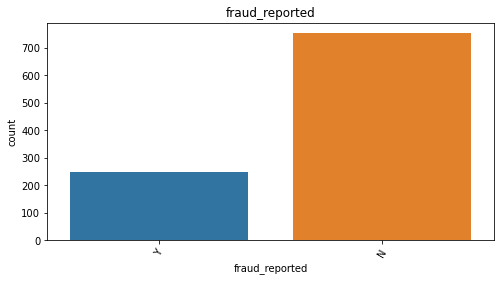

In [47]:
#the count of data for Categorical columns?

for i in df[cat_cols]:              
    plt.figure(figsize = (8, 4))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=60)
    plt.show()


* OH count is more in policy_state.
* Female is more.
* High school and JD are more in number.
* Most of the insured are machine-op-inspect.
* reading is the hobby of most of the insured followed by paintball and excercise.
* most of the insured are own child.
* Most of the incident happened is multiple vehicle collission followed by single vehicle collission and least is parked car.
* Rear collission is the most in the dataset.
* Most of the incident severity is Minor Damage and only a smaller amount of trivial damage occured.
* Contacted authority is mostly Police and least with None contacted.
* NY is the most incident happened state in the dataset and least amount of incidents in OH.
* Springfield is the most incident happened city in the dataset and least amount of incidents in Northbrook.
* Most of the data doesnt have any property damage.
* In most cases, police report is not available.
* Saab, Mercedes and Subaru is the most incident happened vehicles. least incident happened with honda.
* RAM and C300 is the most accident marked vehicles. least is RSX.
* Fraud reported is NO in most cases. genuine cases are more.

# Bivariate analysis


In [48]:
#Lets plot a stacked plot of cat cols with target

def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "pink"])
    ax.xaxis.set_tick_params(rotation=60)
    ax.set_xlabel(group)
    ax.set_ylabel('Fraudreport Percentage')

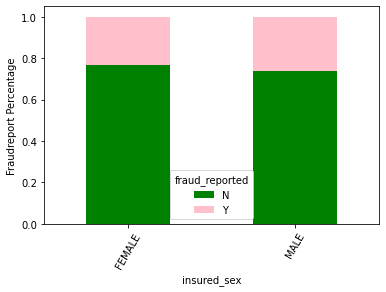

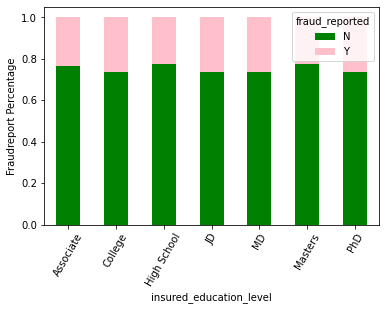

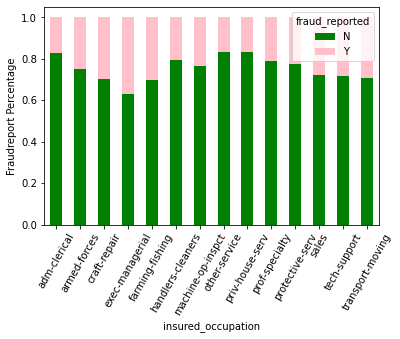

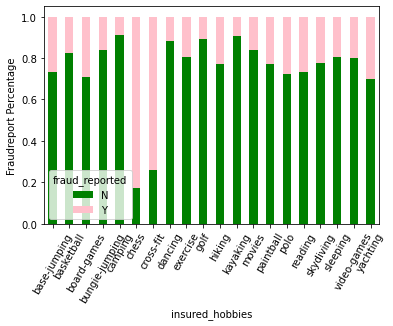

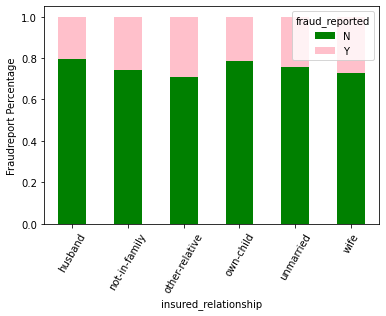

In [49]:
#lets check for insured personal information


stacked_plot(df, "insured_sex", "fraud_reported")
stacked_plot(df, "insured_education_level", "fraud_reported")
stacked_plot(df, "insured_occupation", "fraud_reported")
stacked_plot(df, "insured_hobbies", "fraud_reported")
stacked_plot(df, "insured_relationship", "fraud_reported")


* The insured_sex, insured_education and insured_relationship doesnt have a specific pattern with fraud reported.
* Insured with occupation as adm-clerical, other service and pvt-house-service have more of acceptance of claim than reported as fraud.
* Insured with occupation executive managerial are reported fraud more.
* Insured with hobbies chess and crossfit have been reported as fraud more than others.

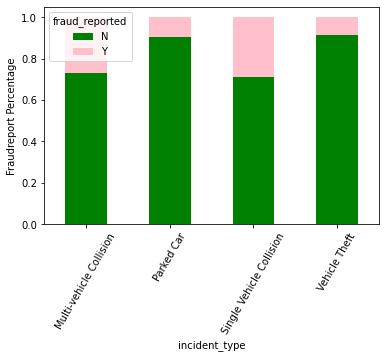

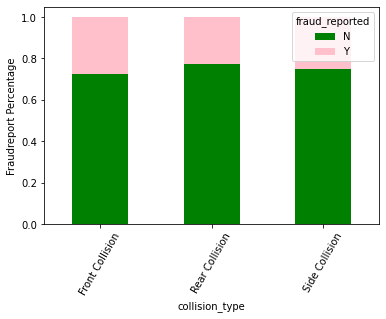

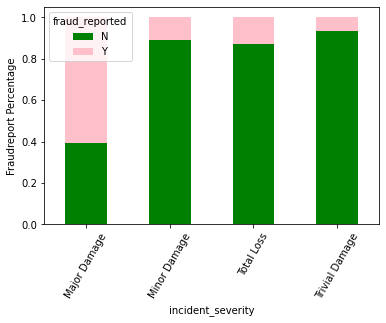

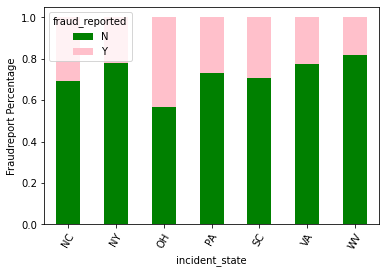

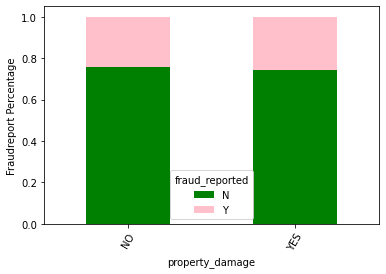

In [50]:
# Lets check relationship between incidents reported and fraud

stacked_plot(df, "incident_type", "fraud_reported")
stacked_plot(df, "collision_type", "fraud_reported")
stacked_plot(df, "incident_severity", "fraud_reported")
stacked_plot(df, "incident_state", "fraud_reported")
stacked_plot(df, "property_damage", "fraud_reported")


* fraud reported is more for single vehicle collission. this might be because there are more data with single vehicle collission.
* No specific relation between target and collission type.
* Major damage is reported as fraud than any other incident severity.
* More number of fraud is reported in OH.
* No specific relation between target and property damage.

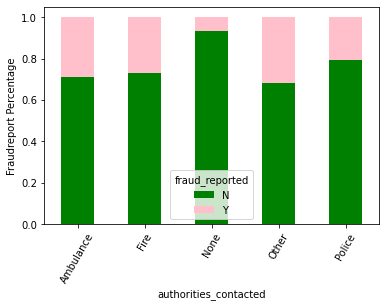

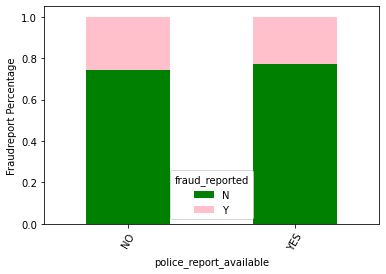

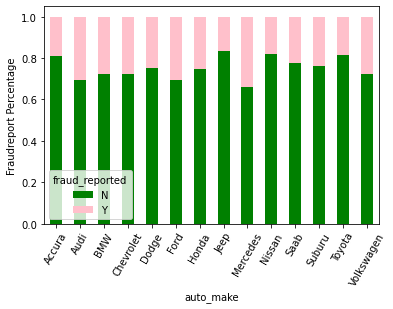

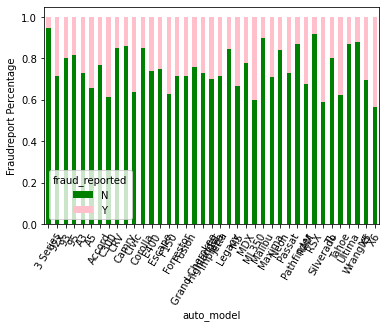

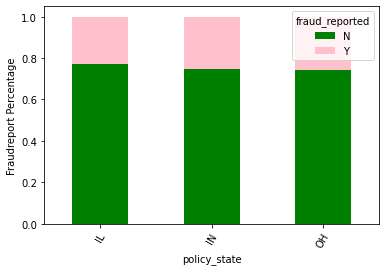

In [51]:
#miscellenious info

stacked_plot(df, "authorities_contacted", "fraud_reported")
stacked_plot(df, "police_report_available", "fraud_reported")
stacked_plot(df, "auto_make", "fraud_reported")
stacked_plot(df, "auto_model", "fraud_reported")
stacked_plot(df, "policy_state", "fraud_reported")

No specific pattern for target and authorities contacted.
No specific pattern for target and police_report_available.
Mercedes is reported fraud more.
No specific pattern for target and policy_state.

In [52]:
num_cols

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_age',
 'csl_per_person',
 'csl_per_accident',
 'policy_bind_year',
 'policy_bind_month',
 'policy_bind_day',
 'incident_month',
 'incident_day']

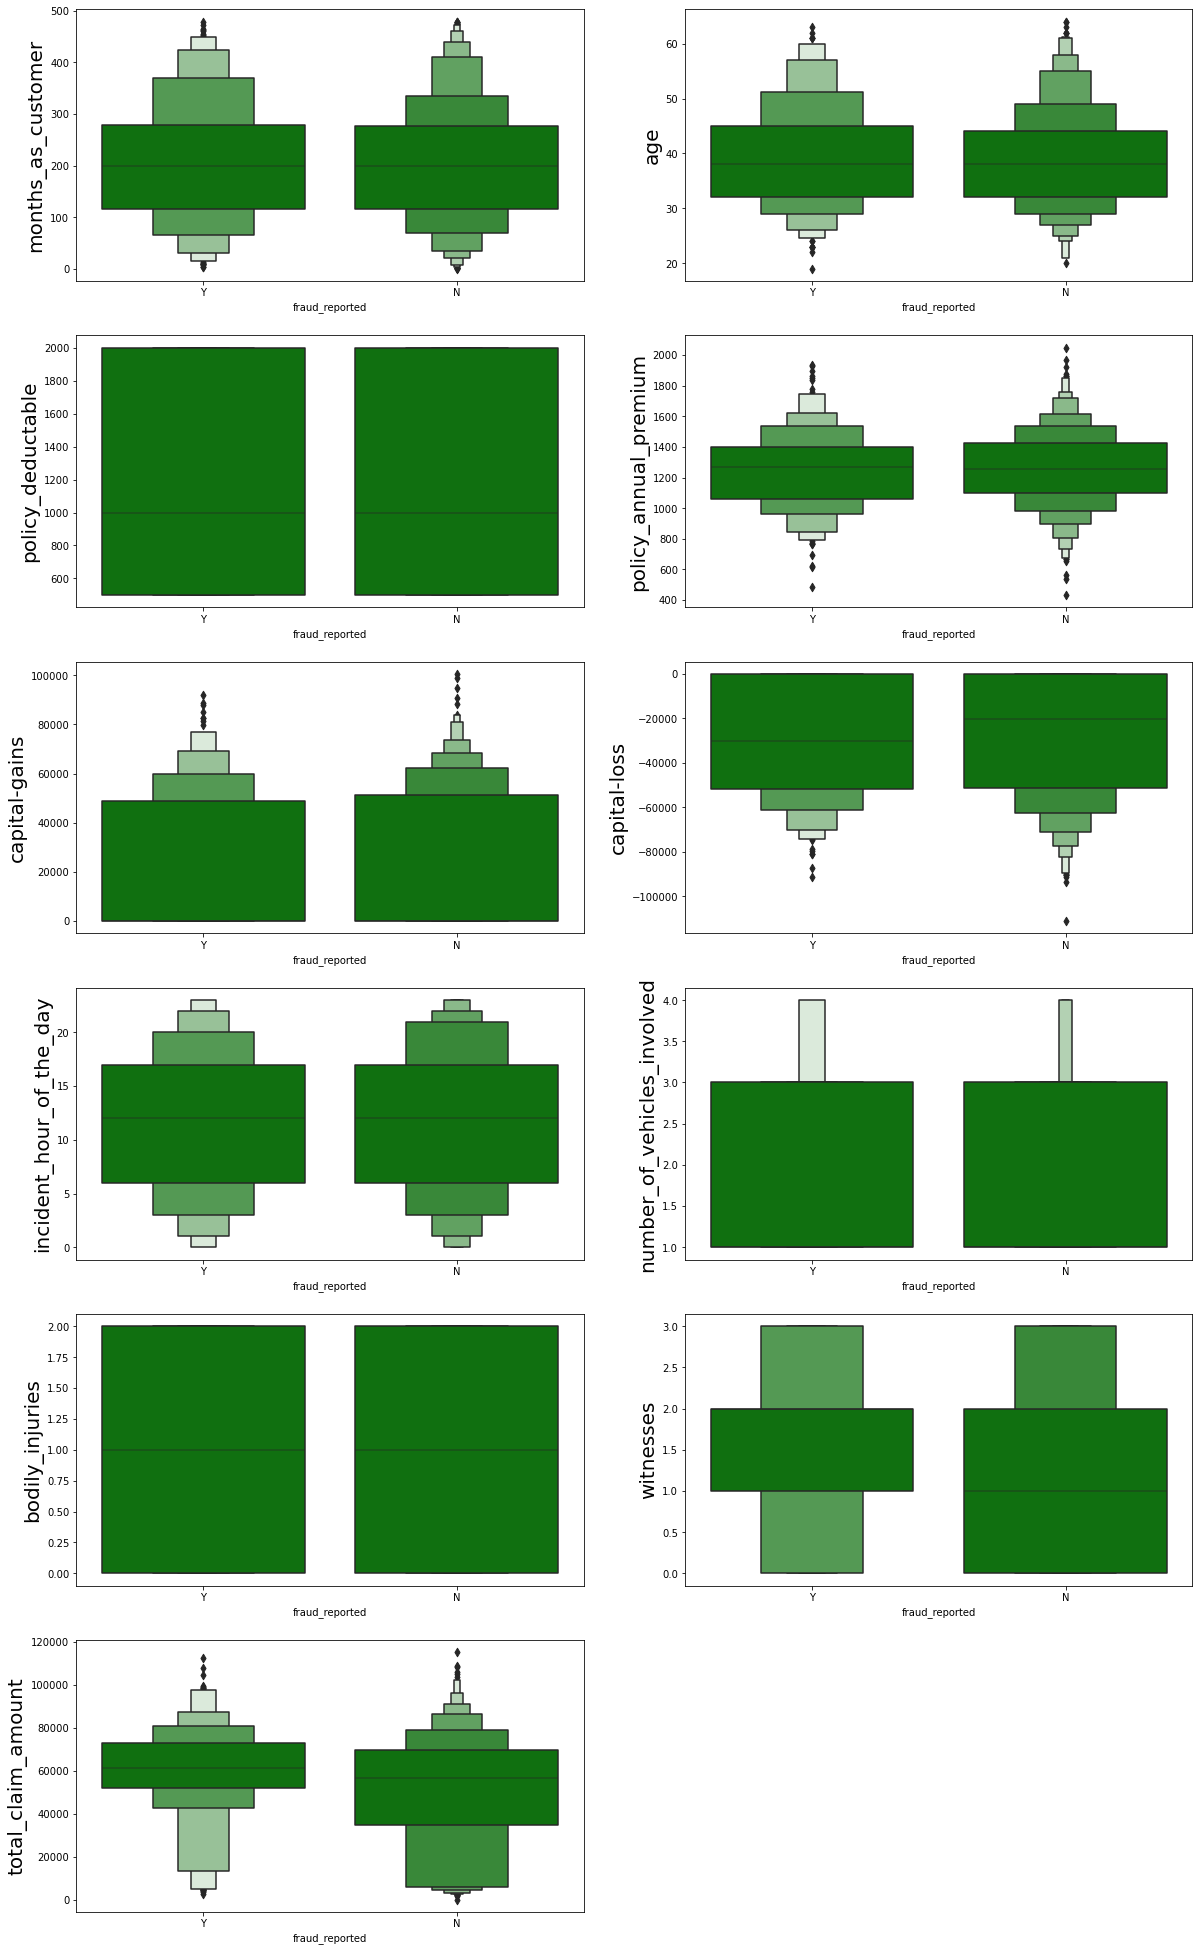

In [53]:
#the relation between numerical columns and the Target Variable?(Boxen plot)

#lets split num_cols
num_cols1=['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',]
num_cols2=['injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_age',
 'csl_per_person',
 'csl_per_accident',
 'policy_bind_year',
 'policy_bind_month',
 'policy_bind_day',
 'incident_month',
 'incident_day']


plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for i in df[num_cols1]:
    if plotnumber<=24 :
        ax = plt.subplot(6,2,plotnumber)
        sns.boxenplot(x=df.fraud_reported,y=df[i],color='green')
        plt.ylabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

None of the numerical columns have specific pattern with target,except for total_claim_amount.
more number of claim amount between 50000 to 75000 is reported as fraud.

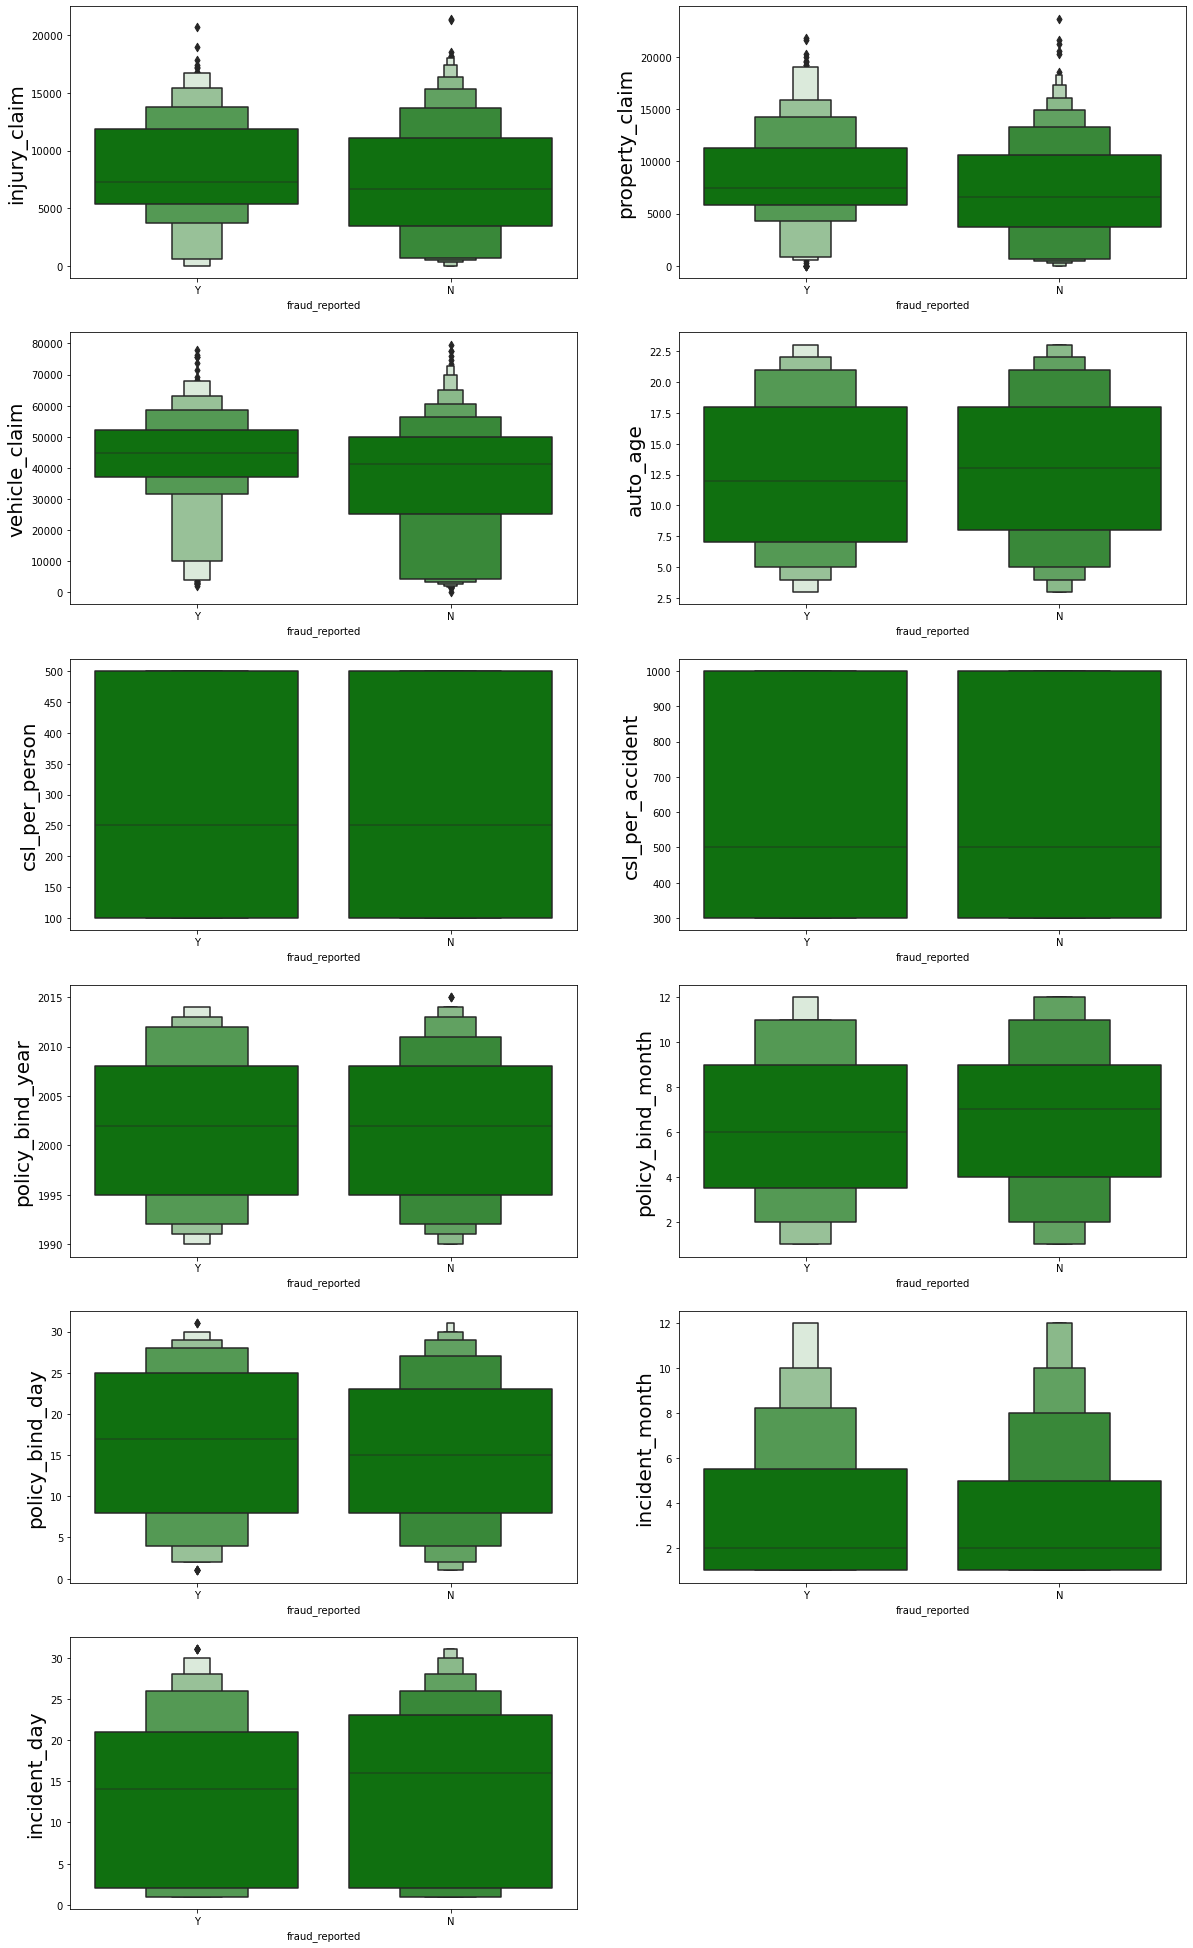

In [54]:
#the relation between numerical columns and the Target Variable?(Boxen plot)

plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1

for i in df[num_cols2]:
    if plotnumber<=24 :
        ax = plt.subplot(6,2,plotnumber)
        sns.boxenplot(x=df.fraud_reported,y=df[i],color='green')
        plt.ylabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

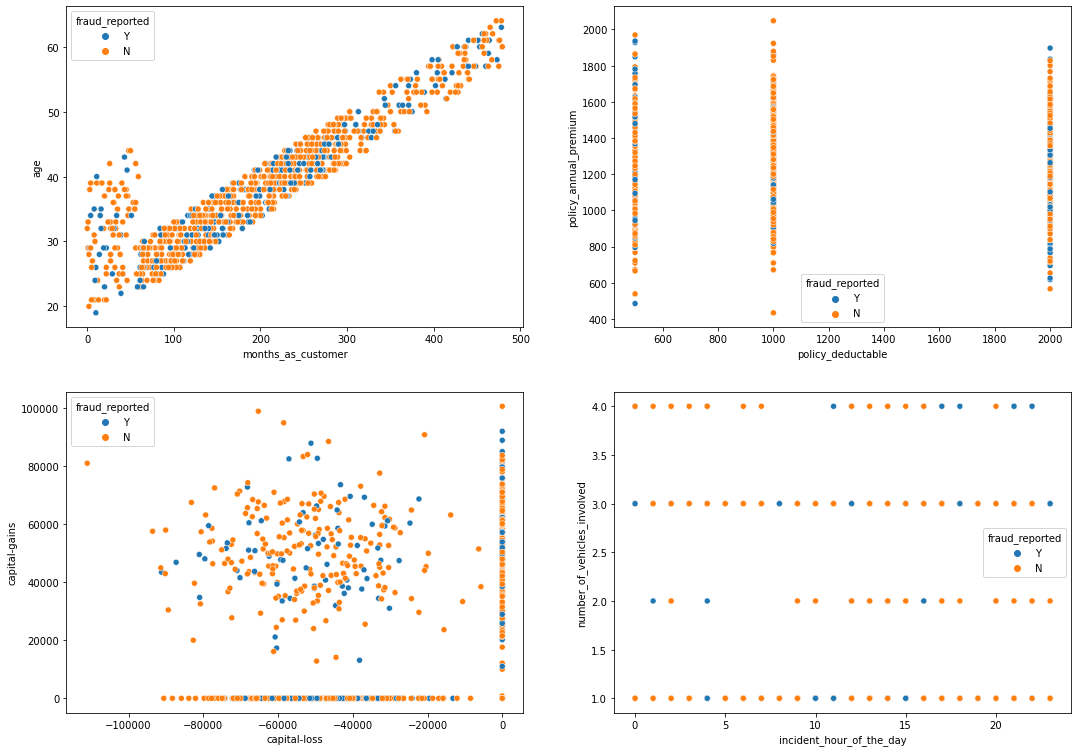

In [55]:
#Comparision between features using scatter plot
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported']);

plt.subplot(2,2,2)
sns.scatterplot(df['policy_deductable'],df['policy_annual_premium'],hue=df['fraud_reported']);

plt.subplot(2,2,3)
sns.scatterplot(df['capital-loss'],df['capital-gains'],hue=df['fraud_reported']);

plt.subplot(2,2,4)
sns.scatterplot(df['incident_hour_of_the_day'],df['number_of_vehicles_involved'],hue=df['fraud_reported']);


We can see that months as customer and age has direct relationship.
no specific pattern in other plots.

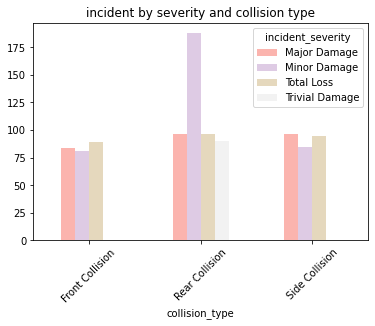

In [56]:
#relationship between collission type and severity

incident = pd.crosstab(df['collision_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='Pastel1', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");


We can see that most of the mionor damage happens in rear collission.

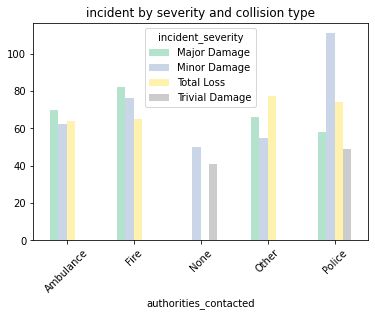

In [57]:
#relationship between authoritiescontacted and severity

incident = pd.crosstab(df['authorities_contacted'], df['incident_severity'])

incident.plot(kind='bar', colormap='Pastel2', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");

Police have contacted for trivial damage in several cases and none Contacted in a few trivial damage cases.
most of the cases reported by police are minor damages.
Most of the major damage has been reported by Fire department followed by ambulance and other.

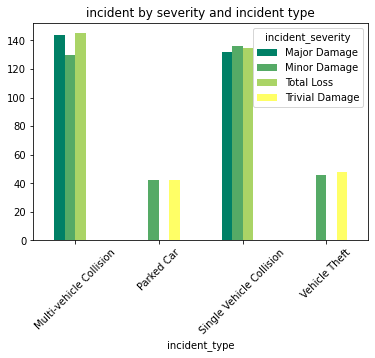

In [58]:
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(df['incident_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='summer',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

* Most of the major damage and total loss happened with multiple vehicle collision.
* Trivial damage happened in parked car and vehicle theft.
* most of the minor damage happened in single vehicle collision.

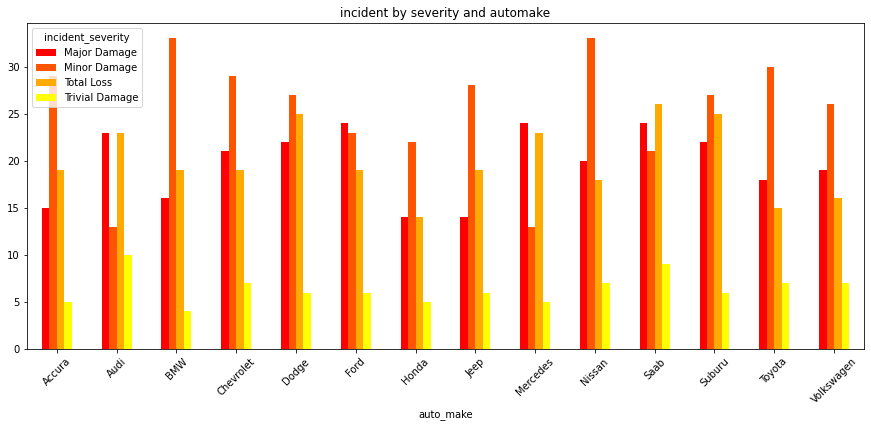

In [59]:
# relation between auto make and severity

incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='autumn',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");

* most of the major damage jhappened with Audi, Mercedes and Saab.
* Most of the minor damage happened with Bmw and nissan.
* Total Loss is more for Dodge, Saab and subaru.

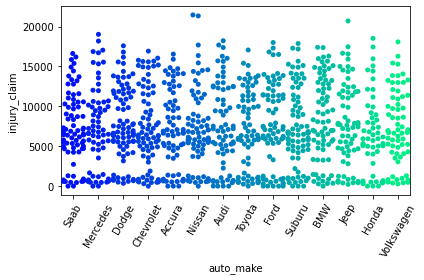

In [60]:
# relation between auto make and injuryclaim

sns.swarmplot(df['auto_make'],df['injury_claim'],palette="winter");
plt.xticks(rotation=60)
plt.tight_layout( )

Nissan has the most insurance_claim.

# Multivariate Analysis


# Data Cleaning
# Outliers

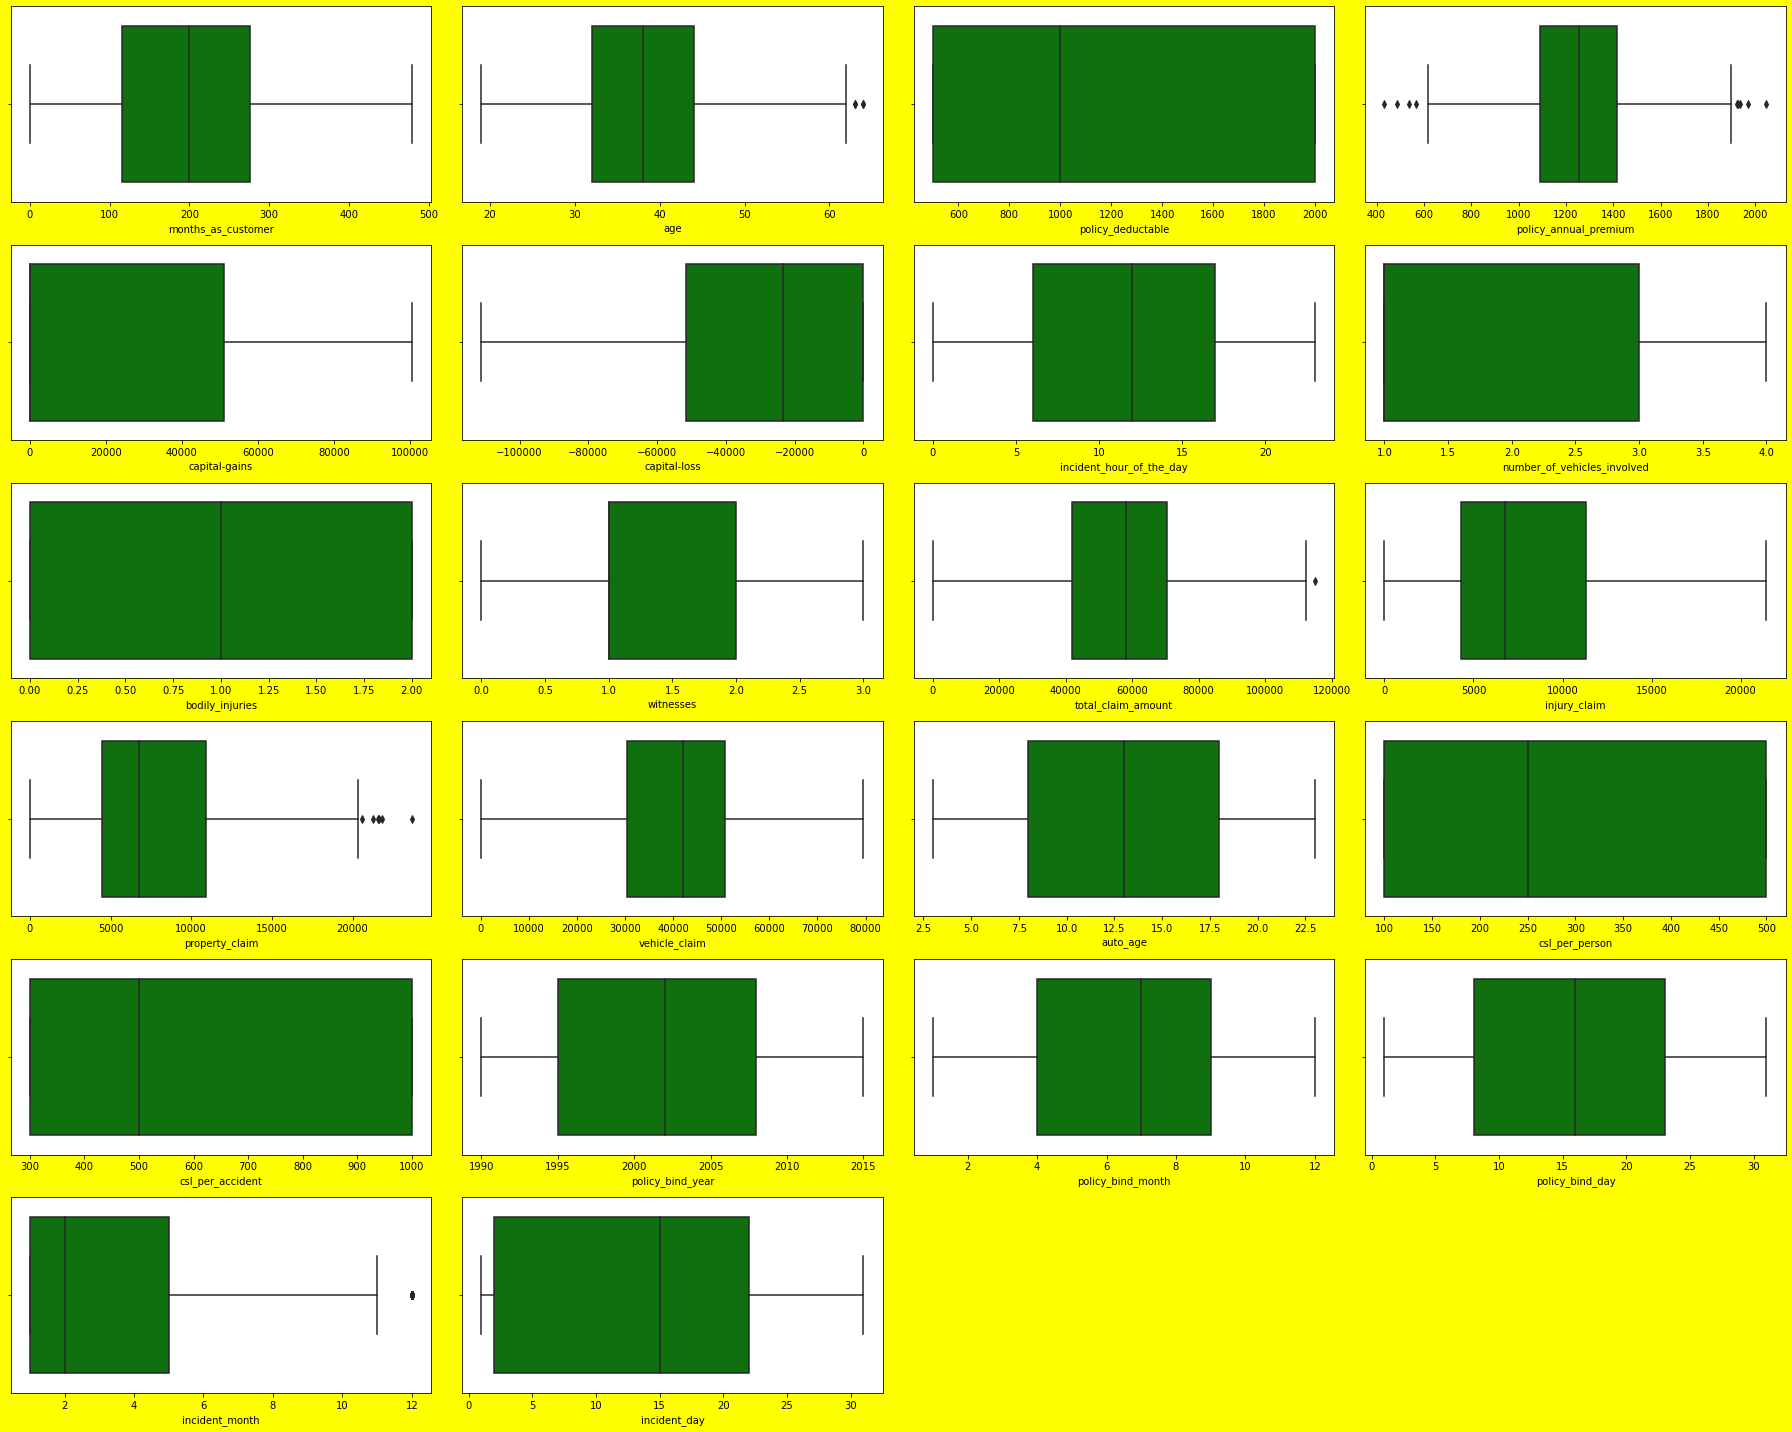

In [62]:
plt.figure(figsize=(25,20),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(6,4,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

# Z-Score Method


In [63]:
out_cols = df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_month']]

from scipy.stats import zscore

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,auto_age,csl_per_person,csl_per_accident,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,14,250,500,2014,10,17,1,25
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,11,250,500,2006,6,27,1,21
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,11,100,300,2000,6,9,2,22
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,4,250,500,1990,5,25,10,1
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,9,500,1000,2014,6,6,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,Accord,N,12,500,1000,1991,7,16,2,22
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,Passat,N,3,100,300,2014,5,1,1,24
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,Impreza,N,22,250,500,2003,2,17,1,23
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,A5,N,20,500,1000,2011,11,18,2,26


In [64]:
print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (1000, 39)
new data shape: (996, 39)


In [65]:
#checking the loss percentage

loss_percentage=(((1000-996)/1000)*100)
loss_percentage

0.4

Loss percentage is very low. So we can proceed with this new dataset.

# Skewness


In [66]:
#checking the skewness

df_new.skew().sort_values()

vehicle_claim                 -0.619755
total_claim_amount            -0.593473
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
policy_bind_month             -0.029722
bodily_injuries                0.011117
witnesses                      0.025758
policy_bind_day                0.028923
policy_annual_premium          0.032042
auto_age                       0.049276
incident_day                   0.055659
policy_bind_year               0.058499
injury_claim                   0.267970
property_claim                 0.357130
months_as_customer             0.359605
csl_per_person                 0.413713
policy_deductable              0.473229
age                            0.474526
capital-gains                  0.478850
number_of_vehicles_involved    0.500364
csl_per_accident               0.609316
incident_month                 1.377097
dtype: float64

In [67]:
#Using Power transformer to remove skewness in TotalCharges

skew_cols=["vehicle_claim", "total_claim_amount", "csl_per_accident", "incident_month"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [68]:
#Checking the skewness again

df_new.skew()

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.508953
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.521354
auto_age                       0.049276
csl_per_person                 0.413713
csl_per_accident               0.110964
policy_bind_year               0.058499
policy_bind_month             -0.029722
policy_bind_day                0.028923
incident_month                 0.305741
incident_day                   0.055659
dtype: float64

Skewness is removed from all columns.

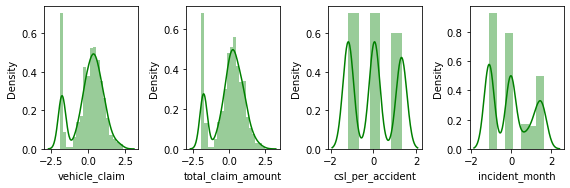

In [69]:
#plot for skewness check

plt.figure(figsize=(10,10))
graph=1 

for column in df_new[skew_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(df_new[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


# Encoding


In [70]:
#Encoding the categorical columns:

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))

In [71]:
df_new[cat_cols].head()


,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2.0,1.0,4.0,2.0,17.0,0.0,2.0,2.0,0.0,4.0,4.0,1.0,1.0,1.0,10.0,1.0,1.0
1,1.0,1.0,4.0,6.0,15.0,2.0,3.0,1.0,1.0,4.0,5.0,5.0,0.0,0.0,8.0,12.0,1.0
2,2.0,0.0,6.0,11.0,2.0,3.0,0.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,4.0,30.0,0.0
3,0.0,0.0,6.0,1.0,2.0,4.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,3.0,34.0,1.0
4,0.0,1.0,0.0,11.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,31.0,0.0


# Correlation


In [72]:
#lets check the correlation

corr=df_new.corr()
corr

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,auto_age,csl_per_person,csl_per_accident,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
months_as_customer,1.000000,0.922092,0.000118,0.023512,-0.003378,0.059002,-0.000848,0.005365,-0.092575,0.071097,...,0.002908,0.020966,-0.001287,-0.022063,-0.022928,-0.046010,0.004955,0.054175,0.019029,-0.013502
age,0.922092,1.000000,-0.015182,0.026772,0.005890,0.072900,0.001485,0.014030,-0.080587,0.075940,...,0.016258,0.012408,-0.003268,-0.012844,-0.012459,-0.035505,0.015874,0.054465,0.016685,-0.008174
policy_state,0.000118,-0.015182,1.000000,0.010740,0.014475,-0.019294,-0.032551,-0.031016,-0.040215,-0.018855,...,-0.024513,0.028864,-0.002323,-0.005866,-0.000653,-0.005709,0.071527,0.001030,0.026233,0.013370
policy_deductable,0.023512,0.026772,0.010740,1.000000,-0.008445,-0.011671,0.014571,-0.050024,0.005134,-0.021763,...,-0.003597,0.015833,-0.027497,0.006634,0.006179,-0.048465,-0.051368,0.011204,-0.000169,-0.018867
policy_annual_premium,-0.003378,0.005890,0.014475,-0.008445,1.000000,0.041830,-0.021475,0.030963,-0.014376,0.006474,...,-0.034998,-0.010174,0.040439,0.028569,0.030755,0.001650,-0.028452,-0.030886,-0.012386,0.016400
insured_sex,0.059002,0.072900,-0.019294,-0.011671,0.041830,1.000000,0.007473,-0.009257,-0.019600,0.004104,...,-0.017679,0.032173,0.028638,-0.019001,-0.008959,-0.031981,-0.007259,0.045694,0.024223,-0.007249
insured_education_level,-0.000848,0.001485,-0.032551,0.014571,-0.021475,0.007473,1.000000,-0.021502,0.022806,-0.021595,...,0.050878,0.011520,-0.045094,0.011093,0.010425,0.017801,-0.007489,0.014464,0.069312,-0.055411
insured_occupation,0.005365,0.014030,-0.031016,-0.050024,0.030963,-0.009257,-0.021502,1.000000,-0.009818,-0.008141,...,0.020878,0.003335,0.004827,0.018978,0.019575,-0.025282,0.024516,-0.003030,0.013226,-0.022786
insured_hobbies,-0.092575,-0.080587,-0.040215,0.005134,-0.014376,-0.019600,0.022806,-0.009818,1.000000,-0.097837,...,0.031208,-0.047983,0.015606,-0.013322,-0.007772,-0.013819,-0.005233,0.028387,-0.001239,0.014295
insured_relationship,0.071097,0.075940,-0.018855,-0.021763,0.006474,0.004104,-0.021595,-0.008141,-0.097837,1.000000,...,0.062286,0.017992,0.026099,-0.022125,-0.031298,-0.006190,0.040931,0.008900,0.039255,-0.083525


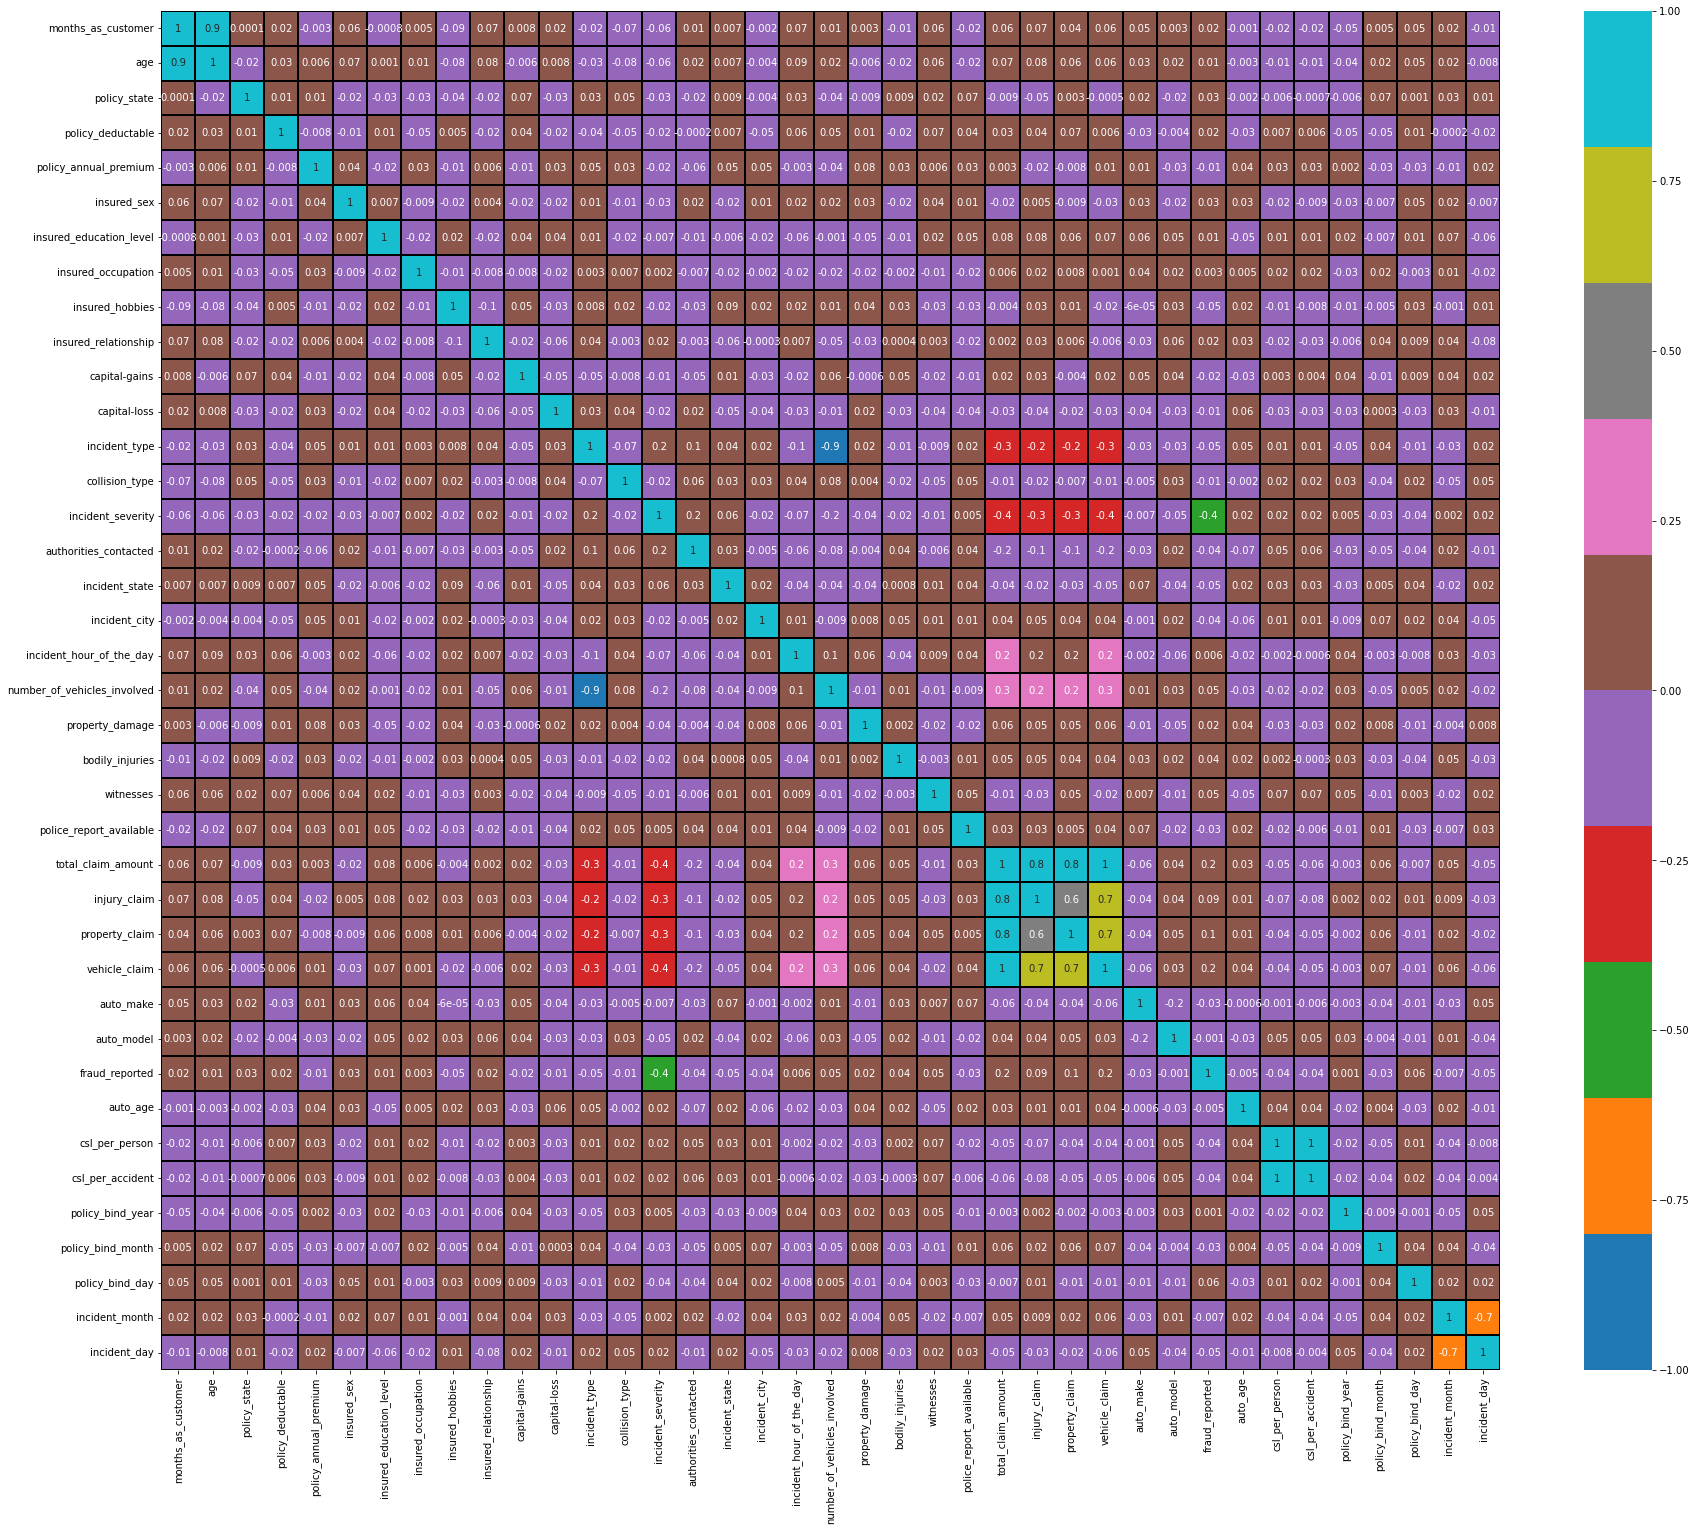

In [73]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="tab10")
plt.yticks(rotation=0);

* There is a high correlation between number_of_vehicles_involved and incident_type.
* High correlation between age and months_as_customer.
* Multicollinearity between total claim amount, injury claim,property claim and vehicle claim.
* Fraud reported is highly correlated with incident type.
* Correlation is very less between fraud reported and all other variables.

In [74]:
corr['fraud_reported'].sort_values(ascending=False)


fraud_reported                 1.000000
vehicle_claim                  0.168862
total_claim_amount             0.162203
property_claim                 0.138572
injury_claim                   0.089900
policy_bind_day                0.059756
witnesses                      0.051283
number_of_vehicles_involved    0.048612
bodily_injuries                0.035484
insured_sex                    0.032173
policy_state                   0.028864
months_as_customer             0.020966
insured_relationship           0.017992
property_damage                0.017270
policy_deductable              0.015833
age                            0.012408
insured_education_level        0.011520
incident_hour_of_the_day       0.005863
insured_occupation             0.003335
policy_bind_year               0.001029
auto_model                    -0.001416
auto_age                      -0.004758
incident_month                -0.007073
policy_annual_premium         -0.010174
capital-loss                  -0.012552


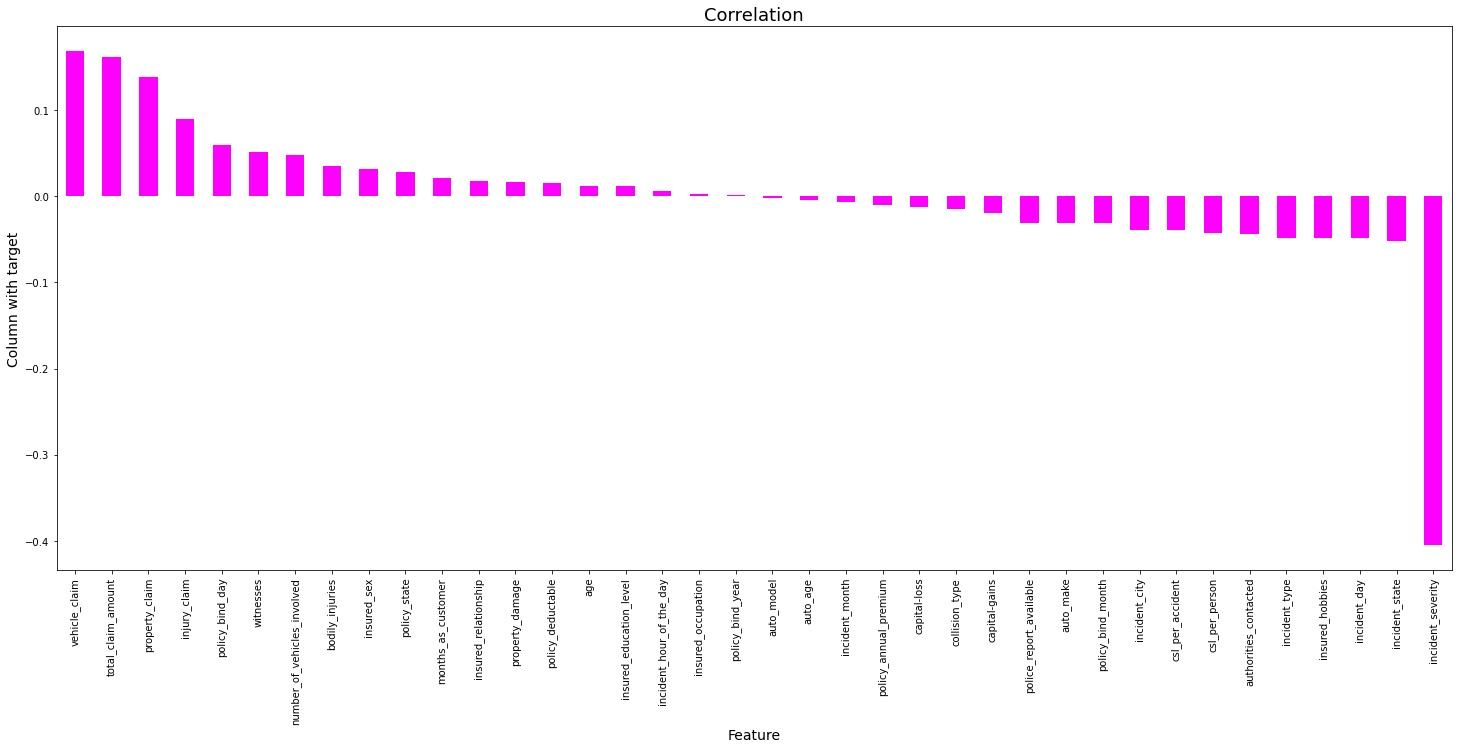

In [75]:
#Visualization of correlation:

plt.figure(figsize=(25,10))
df_new.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='magenta')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()


policy_bind_year is least correlated with target variable.
insured_occupation, auto_model, auto_age and incident_hour_of_the_day are less correlated with target column.

# Data Splitting


In [76]:
#fraud_reported as our target variable

x = df_new.drop("fraud_reported",axis=1)
y = df_new["fraud_reported"]

In [77]:
x.shape

(996, 38)

In [78]:
y.shape

(996,)

# Standardization


In [79]:
#using Standard scaler to normalize the data

from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [80]:
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_age,csl_per_person,csl_per_accident,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,1.074671,0.987190,1.186130,-0.224722,0.621371,1.075102,0.531088,-1.162296,1.280299,-1.436113,...,0.857248,-1.644810,0.182338,-0.137684,0.052612,1.686176,1.013751,0.177487,-1.101370,1.139807
1,0.204846,0.330455,-0.018137,1.409024,-0.251375,1.075102,0.531088,-0.166257,0.928186,-0.246617,...,0.360986,-0.657437,-0.316587,-0.137684,0.052612,0.599693,-0.166145,1.309223,-1.101370,0.756374
2,-0.612790,-1.092470,1.186130,1.409024,0.647301,-0.930144,1.557206,1.078792,-1.360550,0.348131,...,-0.631538,0.958263,-0.316587,-1.066352,-1.174021,-0.215170,-0.166145,-0.727901,-0.026479,0.852233
3,0.448397,0.221000,-1.222403,1.409024,0.658123,-0.930144,1.557206,-1.411305,-1.360550,0.942878,...,-0.879669,1.317308,-1.480744,-0.137684,0.052612,-1.573274,-0.461119,1.082875,1.553647,-1.160788
4,0.204846,0.549367,-1.222403,-0.224722,1.358059,1.075102,-1.521148,1.078792,-1.360550,0.942878,...,-1.624063,1.048024,-0.649203,1.410096,1.313327,1.686176,-0.166145,-1.067422,-0.026479,0.372942


# Multicollinearity

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [82]:
vif_calc()

      VIF Factor                     features
0       6.851319           months_as_customer
1       6.855557                          age
2       1.039410                 policy_state
3       1.045656            policy_deductable
4       1.037450        policy_annual_premium
5       1.037410                  insured_sex
6       1.047043      insured_education_level
7       1.017493           insured_occupation
8       1.052669              insured_hobbies
9       1.052965         insured_relationship
10      1.040529                capital-gains
11      1.042461                 capital-loss
12      5.151758                incident_type
13      1.047678               collision_type
14      1.240895            incident_severity
15      1.107639        authorities_contacted
16      1.045277               incident_state
17      1.030872                incident_city
18      1.102947     incident_hour_of_the_day
19      5.124218  number_of_vehicles_involved
20      1.030337              prop

We have high multicollinearity in total_claim_amount,injury_claim,property_claim,vehicle_claim

In [83]:
#Droping highest  VIF column
x = x.drop(["total_claim_amount"],axis=1)

In [84]:
#check vif again

vif_calc()

    VIF Factor                     features
0     6.849523           months_as_customer
1     6.855452                          age
2     1.039378                 policy_state
3     1.044129            policy_deductable
4     1.036722        policy_annual_premium
5     1.034404                  insured_sex
6     1.046991      insured_education_level
7     1.016776           insured_occupation
8     1.050855              insured_hobbies
9     1.052941         insured_relationship
10    1.040477                capital-gains
11    1.042289                 capital-loss
12    5.141590                incident_type
13    1.047497               collision_type
14    1.195570            incident_severity
15    1.085702        authorities_contacted
16    1.040880               incident_state
17    1.029837                incident_city
18    1.096945     incident_hour_of_the_day
19    5.112157  number_of_vehicles_involved
20    1.030127              property_damage
21    1.026279              bodi

In [85]:
#Droping high VIF columns
x = x.drop(["csl_per_accident"],axis=1)

In [86]:
#check vif again

vif_calc()

    VIF Factor                     features
0     6.847077           months_as_customer
1     6.852905                          age
2     1.038072                 policy_state
3     1.043977            policy_deductable
4     1.036330        policy_annual_premium
5     1.029258                  insured_sex
6     1.046990      insured_education_level
7     1.016674           insured_occupation
8     1.049392              insured_hobbies
9     1.048658         insured_relationship
10    1.040356                capital-gains
11    1.042211                 capital-loss
12    5.138442                incident_type
13    1.047212               collision_type
14    1.195551            incident_severity
15    1.084547        authorities_contacted
16    1.040581               incident_state
17    1.029318                incident_city
18    1.096675     incident_hour_of_the_day
19    5.110588  number_of_vehicles_involved
20    1.030105              property_damage
21    1.026183              bodi

Multicollinearity is below 7 which is good.

# SMOTE Technique

In [87]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

1.0    750
0.0    750
Name: fraud_reported, dtype: int64


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

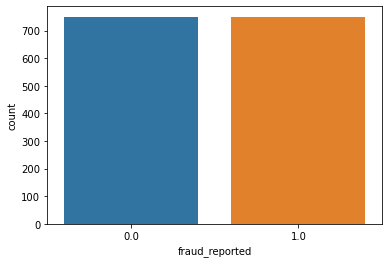

In [88]:
#Checking the count of Raintomorrow

print(y.value_counts())
sns.countplot(y)

# Building the Model

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix,precision_score, f1_score, accuracy_score, classification_report


# 1. Logistic Regression

In [90]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7755555555555556  on Random_state  77


In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.7755555555555556
[[177  45]
 [ 56 172]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       222
         1.0       0.79      0.75      0.77       228

    accuracy                           0.78       450
   macro avg       0.78      0.78      0.78       450
weighted avg       0.78      0.78      0.78       450



In [92]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[100, 10, 1.0, 0.1, 0.01],'multi_class':['auto', 'ovr', 'multinomial']}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 0.01, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
0.7779999999999999


In [93]:
#Reinstating the tuned parameters:


lr=LogisticRegression(C=0.01,solver='saga',penalty='l1',multi_class='auto')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.7955555555555556
[[198  24]
 [ 68 160]]
              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       222
         1.0       0.87      0.70      0.78       228

    accuracy                           0.80       450
   macro avg       0.81      0.80      0.79       450
weighted avg       0.81      0.80      0.79       450



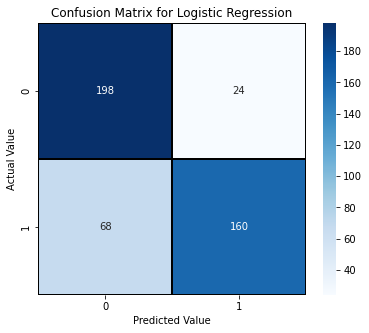

In [94]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 2. Decision Tree Classifier

In [95]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8688888888888889  on Random_state  84


In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8555555555555555
[[206  29]
 [ 36 179]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       235
         1.0       0.86      0.83      0.85       215

    accuracy                           0.86       450
   macro avg       0.86      0.85      0.86       450
weighted avg       0.86      0.86      0.86       450



In [97]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.82
DecisionTreeClassifier(max_depth=21, max_features='sqrt', max_leaf_nodes=20,
                       min_samples_leaf=10)
{'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 10}


In [98]:
#Reinstating the tuned parameters:

dtc_H=DecisionTreeClassifier(criterion='entropy',max_depth=19,max_features='sqrt',
                           max_leaf_nodes=10, min_samples_leaf=5)
dtc_H.fit(x_train,y_train)
dtc_H.score(x_train,y_train)
preddtc=dtc_H.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7422222222222222
[[209  26]
 [ 90 125]]
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78       235
         1.0       0.83      0.58      0.68       215

    accuracy                           0.74       450
   macro avg       0.76      0.74      0.73       450
weighted avg       0.76      0.74      0.74       450



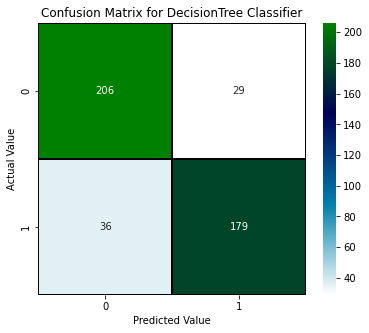

In [99]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# 3. Support Vector Classifier

In [100]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC(kernel='rbf')
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8844444444444445  on Random_state  34


In [101]:
#Calling each kernel by defining svmkernel:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = RS)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [102]:
svmkernel('linear')


0.7577777777777778
[[180  53]
 [ 56 161]]
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       233
         1.0       0.75      0.74      0.75       217

    accuracy                           0.76       450
   macro avg       0.76      0.76      0.76       450
weighted avg       0.76      0.76      0.76       450



In [103]:
svmkernel('poly')


0.8555555555555555
[[183  50]
 [ 15 202]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       233
         1.0       0.80      0.93      0.86       217

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



In [104]:
svmkernel('rbf')


0.8844444444444445
[[199  34]
 [ 18 199]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88       233
         1.0       0.85      0.92      0.88       217

    accuracy                           0.88       450
   macro avg       0.89      0.89      0.88       450
weighted avg       0.89      0.88      0.88       450



rbf is giving  good score

In [105]:
#Hyperparameter tuning of SVC for better accuracy:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

sv=SVC()
sv_grid_param={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gd_sr=GridSearchCV(estimator=sv,param_grid=sv_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9593333333333334


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=84)

svc_h=SVC(kernel= 'rbf',gamma= 0.1 , C=10)
svc_h.fit(x_train,y_train)
svc_h.score(x_train,y_train)
pred_svc=svc_h.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.9377777777777778
[[234   1]
 [ 27 188]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94       235
         1.0       0.99      0.87      0.93       215

    accuracy                           0.94       450
   macro avg       0.95      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



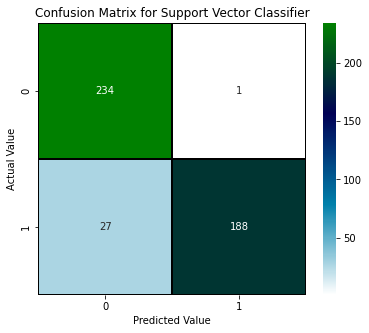

In [107]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# 4. Random Forest Classifier

In [108]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.9177777777777778  on Random_state  93


In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9133333333333333
[[193  18]
 [ 21 218]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       211
         1.0       0.92      0.91      0.92       239

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [111]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

KeyboardInterrupt: 

In [112]:
#reinstating tuned parameters

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =58)

rf_h=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='entropy',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
rf_h.fit(x_train,y_train)
rf_h.score(x_train,y_train)
predrf=rf_h.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9133333333333333
[[227   4]
 [ 35 184]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       231
         1.0       0.98      0.84      0.90       219

    accuracy                           0.91       450
   macro avg       0.92      0.91      0.91       450
weighted avg       0.92      0.91      0.91       450



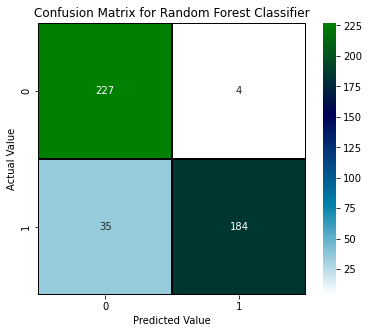

In [113]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# 5. KNN Classifier

In [114]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7  on Random_state  64


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.7
[[ 80 129]
 [  6 235]]
              precision    recall  f1-score   support

         0.0       0.93      0.38      0.54       209
         1.0       0.65      0.98      0.78       241

    accuracy                           0.70       450
   macro avg       0.79      0.68      0.66       450
weighted avg       0.78      0.70      0.67       450



In [116]:
#HyperParameter Tuning of knn:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.arange(1, 25, 2),
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm':['auto','ball_tree','kd_tree','brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.8380000000000001


In [117]:
#Reinstating the tuned parameters
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =14)

knn_h=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform',algorithm='auto')
knn_h.fit(x_train,y_train)
knn_h.score(x_train,y_train)
predknn=knn_h.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8333333333333334
[[160  66]
 [  9 215]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81       226
         1.0       0.77      0.96      0.85       224

    accuracy                           0.83       450
   macro avg       0.86      0.83      0.83       450
weighted avg       0.86      0.83      0.83       450



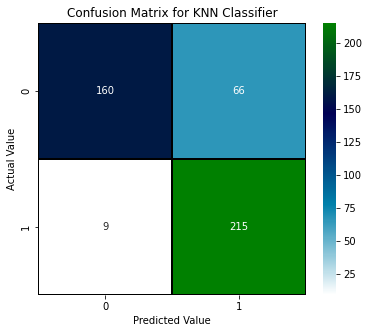

In [118]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean_r", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [119]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.7779999999999999


In [120]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.8153333333333332


In [121]:
score=cross_val_score(svc_h,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)

Cross_Val_Score of SVC: 0.9593333333333334


In [122]:
score=cross_val_score(rf_h,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.8886666666666667


In [123]:
score=cross_val_score(knn_h,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.8380000000000001


Text(0.5, 1.0, 'Cross Validation Scores')

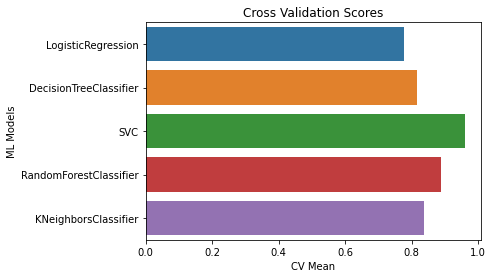

In [126]:
cv_result=[score_a,score_b,score_c,score_d,score_e]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
                                                                            "DecisionTreeClassifier", 
                                                                            "SVC","RandomForestClassifier",
                                                                            "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

Text(0.5, 1.0, 'Accuracy scores of different Models')

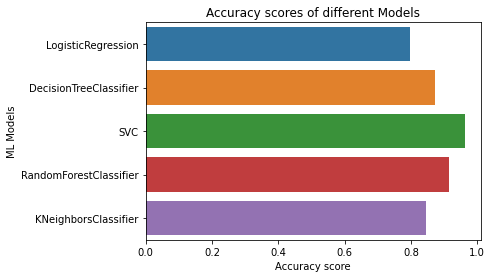

In [128]:
score_lr=0.7977777777777778
score_dtc=0.8733333333333333
score_svc=0.9622222222222222
score_rf=0.9155555555555556
score_knn=0.846666666666666


acc_result=[score_lr,score_dtc,score_svc,score_rf,score_knn]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

We have SVC and KNC as the highest score and CV score